In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Reshape

In [2]:
data = pd.read_pickle("data8.pickle")

In [3]:
data.keys()

dict_keys(['y_validation', 'x_train', 'y_train', 'x_validation', 'labels', 'x_test', 'y_test'])

In [4]:
print("x train shape:", data["x_train"].shape)
print("y train shape:", data["y_train"].shape)
print("x test shape:", data["x_test"].shape)
print("y test shape:", data["y_test"].shape)
print("x validation shape:", data["x_validation"].shape)
print("y validation shape:", data["y_validation"].shape)
print("---------------------------------------------------")
print( data["labels"])

x train shape: (86989, 1, 32, 32)
y train shape: (86989,)
x test shape: (12630, 1, 32, 32)
y test shape: (12630,)
x validation shape: (4410, 1, 32, 32)
y validation shape: (4410,)
---------------------------------------------------
['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', '

In [5]:
x_train = data["x_train"]
x_test = data["x_test"]
x_val = data["x_validation"]
y_train = data["y_train"]
y_test = data["y_test"]
y_val = data["y_validation"]
labels=data["labels"]

In [6]:
x_train = x_train.swapaxes(1,2)
x_train = x_train.swapaxes(2,3)
x_val = x_val.swapaxes(1,2)
x_val = x_val.swapaxes(2,3)
x_test = x_test.swapaxes(1, 2)
x_test = x_test.swapaxes(2, 3)
print("x train shape:", x_train.shape)
print("x test shape:", x_test.shape)
print("x val shape:", x_val.shape)

x train shape: (86989, 32, 32, 1)
x test shape: (12630, 32, 32, 1)
x val shape: (4410, 32, 32, 1)


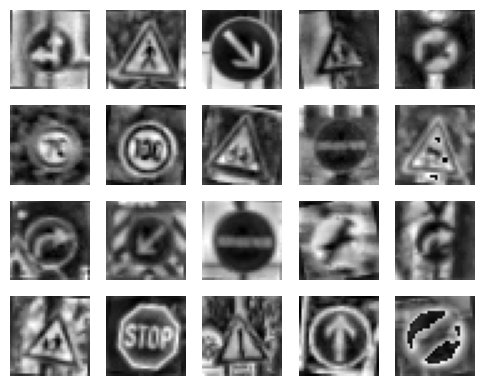

In [7]:
plt.figure(figsize=(6,6)) 

for i in range(20):
    plt.subplot(5,5,i+1)   
    plt.imshow(x_train[i], cmap = "gray")
    plt.axis("off")

plt.show()

In [8]:
def resize(data_images):
    numberofImages = data_images.shape[0]
    new_array = np.zeros((numberofImages,64,64,1))
    for i in range(numberofImages):
        new_array[i] = tf.image.resize(data_images[i],(64,64))
    return new_array

In [9]:
x_train_resized = resize(x_train)
x_val_resized = resize(x_val)
x_test_resized = resize(x_test)
print("x train resized shape:", x_train_resized.shape)
print("x train resized shape:", x_test_resized.shape)
print("x validation resized shape:", x_val_resized.shape)

x train resized shape: (86989, 64, 64, 1)
x train resized shape: (12630, 64, 64, 1)
x validation resized shape: (4410, 64, 64, 1)


In [11]:
NumberofClass = 43
y_train = to_categorical(y_train, num_classes = NumberofClass)
y_test = to_categorical(y_test, num_classes=43)
y_val = to_categorical(y_val, num_classes = NumberofClass)

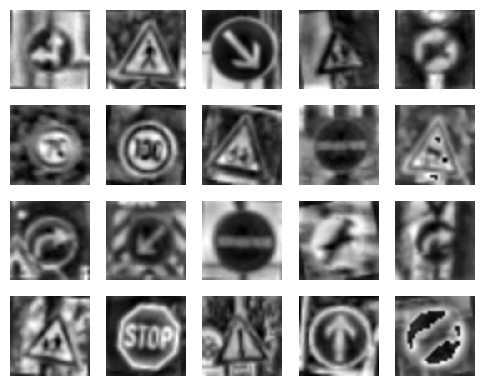

In [10]:
plt.figure(figsize=(6,6)) 

for i in range(20):
    plt.subplot(5,5,i+1)   
    plt.imshow(x_train_resized[i], cmap = "gray")
    plt.axis("off")

plt.show()

In [1]:
model = Sequential()
model.add(Conv2D(filters = 128, kernel_size = (4,4), padding = "Same", activation = "relu", input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), padding = "Same", activation = "relu" ))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (4,4), padding = "Same", activation = "relu" ))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 16, kernel_size = (4,4), padding = "Same", activation = "relu" ))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(units = 512, activation = "relu"))
model.add(Dropout(0.5)) 
model.add(Dense(units = NumberofClass, activation = "argmax"))

NameError: name 'Sequential' is not defined

In [13]:
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [14]:
history = model.fit(x_train_resized, y_train, batch_size = 512,epochs = 10, validation_data = (x_val_resized, y_val))

Epoch 1/10


170/170 [==============================] - 556s 3s/step - loss: 1.9156 - accuracy: 0.4716 - val_loss: 0.7822 - val_accuracy: 0.7651
Epoch 2/10
170/170 [==============================] - 521s 3s/step - loss: 0.4700 - accuracy: 0.8605 - val_loss: 0.3270 - val_accuracy: 0.9102
Epoch 3/10
170/170 [==============================] - 540s 3s/step - loss: 0.1953 - accuracy: 0.9429 - val_loss: 0.2055 - val_accuracy: 0.9463
Epoch 4/10
170/170 [==============================] - 544s 3s/step - loss: 0.1102 - accuracy: 0.9677 - val_loss: 0.2268 - val_accuracy: 0.9569
Epoch 5/10
170/170 [==============================] - 539s 3s/step - loss: 0.0754 - accuracy: 0.9775 - val_loss: 0.1425 - val_accuracy: 0.9658
Epoch 6/10
170/170 [==============================] - 633s 4s/step - loss: 0.0537 - accuracy: 0.9834 - val_loss: 0.1401 - val_accuracy: 0.9671
Epoch 7/10
170/170 [==============================] - 619s 4s/step - loss: 0.0419 - accuracy: 0.9872 - val_loss: 0.1274 - val_accuracy: 0.96

In [15]:
model.evaluate(x_test_resized, y_test)

395/395 [==============================] - 22s 55ms/step - loss: 0.2239 - accuracy: 0.9549


[0.22391201555728912, 0.9548693299293518]

Text(0.5, 1.0, 'Training - Accuracy')

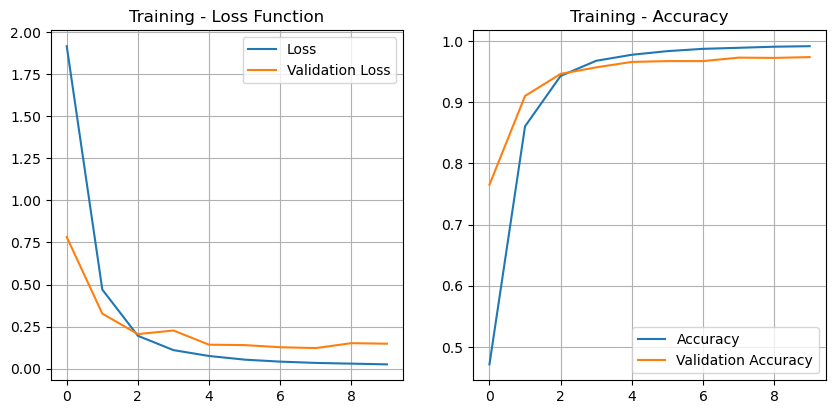

In [16]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid(True)
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.grid(True)
plt.title('Training - Accuracy')

In [17]:
model.save('cnn_model.keras')